# **Instalar bibliotecas necesarias**

In [2]:
%%capture
!pip install langchain-community==0.2.1
!pip install pypdf==4.2.0
!pip install PyMuPDF==1.24.5
!pip install unstructured==0.14.8
!pip install markdown==3.6
!pip install jq==1.7.0
!pip install pandas==2.2.2
!pip install docx2txt==0.8
!pip install requests==2.32.3
!pip install beautifulsoup4==4.12.3
!pip install nltk==3.8.0
!pip install pypdfium2
!pip install arxiv
# Dependencias extra para unstructured que a veces fallan en colab
!pip install python-magic
!apt-get install poppler-utils tesseract-ocr

### Después de que termine de instalarse todo en el paso anterior, debes reiniciar el kernel para que Colab reconozca las nuevas librerías.

# **Importar bibliotecas**

In [1]:
# Instalar bibliotecas necesarias
!pip install langchain faiss-cpu transformers sentence-transformers pypdf python-docx

# Importar bibliotecas
from langchain.document_loaders import PyPDFLoader, Docx2txtLoader, TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from transformers import pipeline

import os
import gradio as gr

# **Función para Cargar Documentos**

In [2]:
# Cargar documentos
def cargar_documentos(ruta_archivo, tipo_documento):
    if tipo_documento == "pdf":
        loader = PyPDFLoader(ruta_archivo)
    elif tipo_documento == "docx":
        loader = Docx2txtLoader(ruta_archivo)
    elif tipo_documento == "txt":
        loader = TextLoader(ruta_archivo)
    else:
        raise ValueError("Tipo de documento no soportado.")
    return loader.load()

Descripción:
Esta función carga un documento en el formato especificado (PDF, DOCX, TXT) y devuelve su contenido como una lista de objetos Document de LangChain.
¿Por qué se creó así?

Flexibilidad: Soporta múltiples formatos de documento.
Integración con LangChain: Devuelve objetos Document que son compatibles con otras funciones de LangChain, como la división en fragmentos y la creación de índices.


# **Dividir documentos en fragmentos**

In [3]:
# Dividir documentos en fragmentos
def dividir_documentos(documentos):
    text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
    return text_splitter.split_documents(documentos)

Descripción:
Divide el contenido de los documentos en fragmentos más pequeños (chunks) para facilitar su procesamiento.

Parámetros:

chunk_size=1000: Tamaño máximo de cada fragmento en caracteres.
chunk_overlap=0: Número de caracteres que se superponen entre fragmentos consecutivos (útil para evitar cortar palabras o frases importantes).

¿Por qué se creó así?

Manejo de documentos largos: Los modelos de lenguaje y los embeddings funcionan mejor con textos de longitud moderada.
Eficiencia: Fragmentos más pequeños permiten una indexación y búsqueda más eficiente.


# **Crear índice de búsqueda**

In [4]:
# Crear índice de búsqueda
def crear_indice(documentos):
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
    return FAISS.from_documents(documentos, embeddings)

Descripción:
Crea un índice de búsqueda en FAISS utilizando los embeddings generados por sentence-transformers.

¿Por qué se creó así?

Búsqueda semántica: Los embeddings capturan el significado del texto, permitiendo buscar información relevante incluso si no hay coincidencias exactas de palabras.
Eficiencia: FAISS permite realizar búsquedas rápidas en grandes conjuntos de datos.


# **Buscar información**

In [5]:
# Buscar información
def buscar_informacion(indice, consulta):
    return indice.similarity_search(consulta)

Descripción:
Realiza una búsqueda en el índice de FAISS para encontrar los fragmentos más relevantes a la consulta.

¿Por qué se creó así?

Similitud semántica: Utiliza los embeddings para encontrar fragmentos que sean semánticamente similares a la consulta, no solo coincidencias exactas.
Resultados relevantes: Devuelve los fragmentos más cercanos a la consulta en el espacio vectorial.


# **Generar resumen**

In [6]:
# Generar resumen
def generar_resumen(texto):
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
    return summarizer(texto, max_length=130, min_length=30, do_sample=False)

Descripción:
Genera un resumen del texto proporcionado utilizando el modelo facebook/bart-large-cnn.

Parámetros:

max_length=130: Longitud máxima del resumen en tokens.
min_length=30: Longitud mínima del resumen en tokens.
do_sample=False: Desactiva el muestreo aleatorio para generar resúmenes deterministas.

¿Por qué se creó así?

Generación de texto coherente: BART está diseñado para generar resúmenes de alta calidad.
Control de longitud: Limita la longitud del resumen para que sea conciso y relevante.


# **Ejemplos de uso**

In [7]:
# Ejemplo de uso
documentos = cargar_documentos("/content/39307_Inteligencia_artificial.pdf", "pdf")
fragmentos = dividir_documentos(documentos)
indice = crear_indice(fragmentos)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [8]:
# Buscar información
resultado_busqueda = buscar_informacion(indice, "¿Los chatbots cómo cambiarán la comunicación?")
print("Resultado de la búsqueda:", resultado_busqueda[1].page_content)

Resultado de la búsqueda: INTELIGENCIA ARTIFICIAL
28
sar de que usa ejemplos de empresas tecnológicas estadou-
nidenses, estos pasos son también aplicables a otras com-
pañías internacionales que dependen de la IA como 
Alibaba, Baidu y Tencent. Los pasos son los siguientes:
1.
  Obtención de más datos: la idea clave en este paso 
es que las empresas tecnológicas puedan crear servi-
cios 
tan útiles que la gente esté dispuesta a permitir 
que sus datos sean utilizados por el servicio. Un 
ejemplo de ello es el motor de búsqueda de Goo-
gle, que abarca una gran cantidad de datos. De 
igual manera, Facebook no sería una red social tan 
poderosa si no tuviera acceso a la información so-
bre las tendencias sociales de sus usuarios.
2.
  Mejores productos basados en la IA: en empresas 
como Google y Facebook, la experiencia de usuario 
se personaliza para que sea importante y relevante 
para éste, lo que es posible gracias a que la IA mejo
-
ra sus productos.
3.  Mayor número de usuarios: c

In [10]:
# Generar resumen
resumen = generar_resumen(resultado_busqueda[0].page_content)
print("Resumen:", resumen[0]['summary_text'])

Device set to use cpu


Resumen: Cómo cambiará la inteligencia artificial      múltiples industrias.............................  57676. Preguntas frecuentes sobre la IA (primera parte) ..  301676. Cómo Cambiarán la comunicación...  115676.


In [11]:
# Buscar información sobre redes neuronales
resultado_busqueda = buscar_informacion(indice, "¿Qué es la IA?")

# Imprimir el resultado
print("Resultado de la búsqueda:")
print(resultado_busqueda[1].page_content)


Resultado de la búsqueda:
INTELIGENCIA ARTIFICIAL
16
E
n este capítulo encontrarás una descripción de la inteli-
gencia artificial (IA) desde un punto de vista general. 
Cubriremos algunas de sus definiciones básicas, las razones 
por las que su papel en nuestras vidas es tan importante 
hoy día y las ventajas y desventajas de la misma. Hablare-
mos también de la importancia de los datos para que la IA 
funcione y la rapidez en que ésta se está desarrollando.
El libro en general ha sido elaborado para despertar la 
curiosidad del lector y compartir algunas ideas con las que 
podrá sacar provecho de esta tecnología. Si bien, como he-
mos mencionado, no pretende ser una fuente de informa-
ción que abarque todos los temas relacionados con la IA. 
Espero que la información que encuentre aquí el lector lla-
me su atención y le inspire para profundizar en el mundo 
de la IA y sus aplicaciones. Al final de este capítulo, podrás 
ver un listado de recursos para consultar, si deseas profun-
diz

In [12]:
# Buscar información sobre redes neuronales
resultado_busqueda = buscar_informacion(indice, "¿Qué son los chatbots?")

# Imprimir el resultado
print("Resultado de la búsqueda:")
print(resultado_busqueda[1].page_content)

Resultado de la búsqueda:
INTELIGENCIA ARTIFICIAL
28
sar de que usa ejemplos de empresas tecnológicas estadou-
nidenses, estos pasos son también aplicables a otras com-
pañías internacionales que dependen de la IA como 
Alibaba, Baidu y Tencent. Los pasos son los siguientes:
1.
  Obtención de más datos: la idea clave en este paso 
es que las empresas tecnológicas puedan crear servi-
cios 
tan útiles que la gente esté dispuesta a permitir 
que sus datos sean utilizados por el servicio. Un 
ejemplo de ello es el motor de búsqueda de Goo-
gle, que abarca una gran cantidad de datos. De 
igual manera, Facebook no sería una red social tan 
poderosa si no tuviera acceso a la información so-
bre las tendencias sociales de sus usuarios.
2.
  Mejores productos basados en la IA: en empresas 
como Google y Facebook, la experiencia de usuario 
se personaliza para que sea importante y relevante 
para éste, lo que es posible gracias a que la IA mejo
-
ra sus productos.
3.  Mayor número de usuarios: c

# **Función para Exportar Resultados a un Archivo de Texto**

In [7]:
# Función para exportar resultados a un archivo de texto
def exportar_a_txt(texto, nombre_archivo="resumen.txt"):
    with open(nombre_archivo, "w") as archivo:
        archivo.write(texto)
    return f"Resultado exportado a {nombre_archivo}"

Descripción:
Guarda el texto proporcionado en un archivo de texto.

¿Por qué se creó así?

Persistencia: Permite guardar los resultados para su uso posterior.
Simplicidad: Utiliza operaciones básicas de escritura de archivos en Python.


# **Función principal para la interfaz de Gradio**

In [8]:
# Función principal para la interfaz de Gradio
def interfaz_busqueda(ruta_documento, consulta):
    # Determinar el tipo de documento según la extensión
    _, extension = os.path.splitext(ruta_documento)
    tipo_documento = extension[1:].lower()  # Remover el punto y convertir a minúsculas

    # Cargar y procesar el documento
    documentos = cargar_documentos(ruta_documento, tipo_documento)
    fragmentos = dividir_documentos(documentos)
    indice = crear_indice(fragmentos)

    # Buscar información y generar resumen
    resultado = buscar_informacion(indice, consulta)
    resumen = generar_resumen(resultado[1].page_content)

    # Exportar el resumen a un archivo de texto
    exportar_a_txt(resumen[0]['summary_text'])

    return resumen[0]['summary_text']

# **Crear la interfaz de Gradio**

In [9]:
# Crear la interfaz de Gradio
iface = gr.Interface(
    fn=interfaz_busqueda,
    inputs=[
        gr.File(label="Sube un documento (PDF, DOCX, TXT)"),
        gr.Textbox(label="Ingresa tu consulta")
    ],
    outputs="text",
    title="Sistema de Búsqueda y Resumen de Documentos",
    description="Sube un documento y realiza una consulta para obtener un resumen."
)

# **Lanzar la interfaz**

In [10]:
# Lanzar la interfaz
iface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bc1b7f804909b38376.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


Created dataset file at: .gradio/flagged/dataset1.csv
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bc1b7f804909b38376.gradio.live


Capture de ejecución del sistema de búsqueda y resumen de documentos en la interfaz de Gradio.

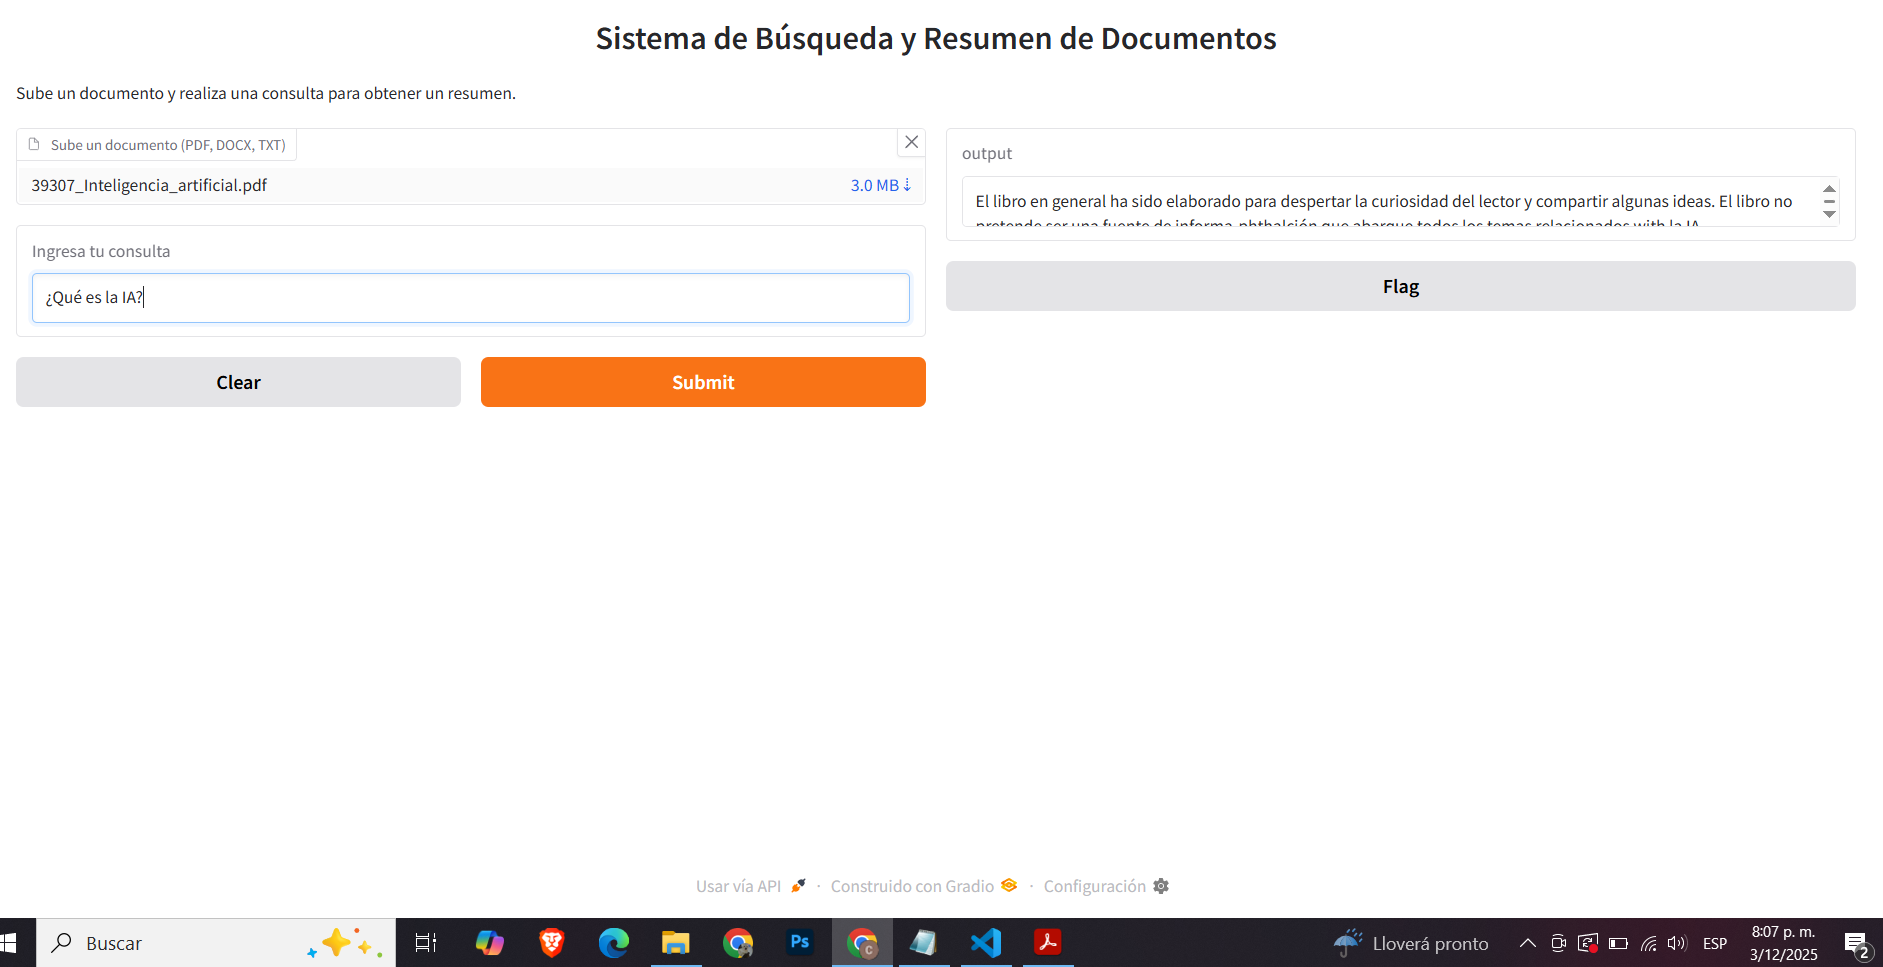